In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D

## Using tensorflow datasets

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
# List of all available datasets
datasets = tfds.list_builders()
print(datasets)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'ai2dcaption', 'aloha_mobile', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asimov_dilemmas_auto_val', 'asimov_dilemmas_scifi_train', 'asimov_dilemmas_scifi_val', 'asimov_injury_val', 'asimov_multimodal_auto_val', 'asimov_multimodal_manual_val', 'asqa', 'asset', 'assin2', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bair_robot_pushing_small', 'bc_z', 'bccd', 'beans', 'bee_dataset', 'beir', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'b

In [ ]:
# Load dataset
(xtrain, xtest), ds_info = tfds.load(
    name='food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True, # Data will returned in tuple formate
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.T2OU27_2.0.0/food101-train.tfrecord*...:   0%|         …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/incomplete.T2OU27_2.0.0/food101-validation.tfrecord*...:   0%|    …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
# Features of Food101 dataset
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
# Get the class name
class_names = ds_info.features['label'].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
## Exploring dataset from tensorflow
xtrain

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Taking one sample from dataset
xtrain.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Getting information about the dataset
for image, label in xtrain.take(1):
  print(f'''
  Image shape : {image.shape}
  Image datatype:{image.dtype}
  Label : {label}
  class name (str form) : {class_names[label.numpy()]}
  ''')


  Image shape : (512, 512, 3)
  Image datatype:<dtype: 'uint8'>
  Label : 30
  class name (str form) : deviled_eggs
  


In [ ]:
# Get the imaeg data
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 28,  31,  50],
        [ 27,  30,  49],
        [ 21,  23,  44],
        ...,
        [ 17,  28,  60],
        [ 20,  30,  65],
        [ 28,  38,  73]],

       [[ 11,  14,  33],
        [ 23,  26,  45],
        [ 24,  26,  47],
        ...,
        [ 39,  50,  82],
        [ 33,  44,  76],
        [ 19,  30,  62]],

       [[ 16,  17,  37],
        [ 23,  24,  44],
        [ 19,  20,  40],
        ...,
        [ 45,  56,  86],
        [ 39,  50,  80],
        [ 36,  47,  77]],

       ...,

       [[148,  94, 117],
        [153,  99, 122],
        [153, 102, 121],
        ...,
        [ 94, 128, 166],
        [ 96, 130, 168],
        [ 96, 131, 169]],

       [[143,  89, 112],
        [151,  97, 120],
        [153, 102, 121],
        ...,
        [102, 134, 173],
        [103, 135, 174],
        [101, 135, 173]],

       [[145,  91, 114],
        [154, 100, 123],
        [158, 107, 126],
        ...,
        [105, 137, 17

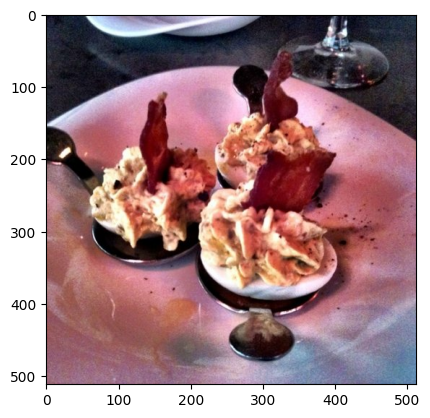

In [ ]:
# Plotting the image of tensor
plt.imshow(image.numpy())

## Preprocessing function for data
* Data should be in pixel between (0-255)
* Data should be in single data type (eg all should be float 32 or other)
* normalization of the data

## Using the pretrained model
* All image size should be in same size
* convert the datatype from unit8 to float 32





In [ ]:
def preprocessing(image,label,image_shape = 256):
  image = tf.image.resize(image, (image_shape, image_shape))
  return tf.cast(image, tf.float32), label

In [ ]:
preprocess_image = preprocessing(image,label)[0]


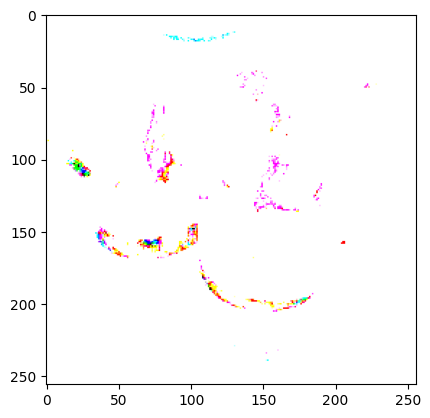

In [ ]:
plt.imshow(preprocess_image.numpy())


In [ ]:
# Checking the datatype of image
print(preprocess_image.dtype)
print(preprocess_image.shape)

<dtype: 'float32'>
(256, 256, 3)


## Creating batches of Data
-  .map function is used to apply the function on whole dataset

In [ ]:
# Map preprocessing function to training and parallelize
train_data = xtrain.map(map_func=preprocessing, num_parallel_calls= tf.data.AUTOTUNE)
## Suffle train_data
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

## Map preprocessing function to test data
test_data = xtest.map(map_func = preprocessing,num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

## Callbacks functions
* Callbacks are a tool which can add helpful functionality to your models during traing, evaluation or inference
* Some Populare callback functions ---


*   TensorBoard ---------------> Check the performance of multiple Models and  view and compare these models and provide a dashboards for all the models with comparision

```
tf.keras.callbacks.TensorBoard()
```


*   Model CheckPointing -------> Save your model as it trains so you can stop training if needed you can come back to continue off where you left.


```
tf.keras.callbacks.ModelCheckpoint()
```


*   Early Stopping ------------>  Leave your model training for an arbitory amount of time and have it stop training automatically when it ceases to improve.


```
tf.keras.callbacks.EarlyStopping()
```





In [ ]:
# Using the callback function
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [ ]:
# Using the checkpoints
checkpoint_path = 'model_checkpoint/checkpoint.weights.h5'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                   monitor = 'val_acc',
                                   save_best_only = True,
                                   save_weights_only = True,
                                   verbose = 1
                                   )

## Mixed Precision
* Mixed precision utilizes a combination of float 32 and float16 to speed up the model performance
* It can improve the efficiency of model by 3x

In [ ]:
from keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

## Building feature extraction model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# Create/Importing Prebuilt Model
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(include_top=True) # Use when directly You want to you that model

base_model= EfficientNetB0(include_top=False) # Use when you want to make some modificaiton in the model

# I am going to add some other layers, so i will use include_top = False



21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


* Making some modification in EFFICIENTNETB0 Model

In [ ]:
# Making some modification in EFFICIENTNETB0 Model

from tensorflow.keras import layers, models

new_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
# Summary
new_model.summary(

)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 4,136,929 (15.78 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
# Compiling the Model
new_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## Check whether Mixed Precision is working or Not

In [ ]:
for layer in new_model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

efficientnetb0 True float32 <DTypePolicy "mixed_float16">
global_average_pooling2d True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">


## Training the model

In [ ]:
history = new_model.fit(train_data, epochs = 3, validation_data=test_data)

Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 352s 147ms/step - accuracy: 0.4792 - loss: 2.1265 - val_accuracy: 0.7201 - val_loss: 1.0359
Epoch 2/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 276s 115ms/step - accuracy: 0.7143 - loss: 1.0716 - val_accuracy: 0.7521 - val_loss: 0.9208
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 305s 128ms/step - accuracy: 0.7744 - loss: 0.8202 - val_accuracy: 0.7255 - val_loss: 1.0248
